# Update ID in annotation volume to reflect segmentation of ROI by fiber innervation

- inputs
    - annotation_100_segmented_combined_gene.nrrd
    - AV_target_ROI_ID_672_fiber_from_AI_to_CP.nrrd
- output
    - annotation_100_segmented_combined_gene_fiber.nrrd

In [11]:
Target_ROI_ID = 672 
Fiber_from ='AI' # injection structure in ID or acronym
Fiber_to = 'CP' # Caudoputamen, id 672, target structure in ID or acronym

dir_data = 'data'
dir_fig = 'figs'
dir_fiber = 'fiber_data\\From_AI_TO_CP\\'

fn_input_AV_ori = 'AVbase_c_g.nrrd'
fn_input_AV_fiber = 'AV_target_ROI_ID_672_fiber_from_AI_to_CP.nrrd'

fn_output_AV_update = 'AVbase_c_g_f.nrrd'

In [10]:
import os
import nrrd
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt

# just used for displaying data
SliceIdx = 84
CoronalIdx = np.linspace(43,53,3)

# Load data

In [12]:
AV_ori, header = nrrd.read(os.path.join(dir_data, fn_input_AV_ori))
AV_fiber, header_fiber = nrrd.read(os.path.join(dir_data, fn_input_AV_fiber))

# Check loaded data


## Fiber innervation

upper low: fiber innervation high
upper low: fiber innervation low


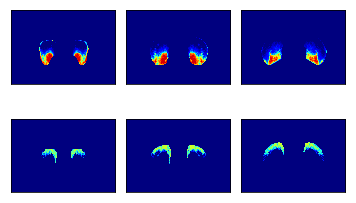

In [13]:
print('upper low: fiber innervation high')
print('upper low: fiber innervation low')
slices = [int(x) for x in CoronalIdx.round()]
fig1, ax1 = plt.subplots(2,len(CoronalIdx), facecolor='w')
for count, idx in enumerate(slices):
    H1 = ax1[0, count].imshow(AV_fiber[idx,:,:], cmap='jet', vmin=0, vmax=1)
    H2 = ax1[1,count].imshow(-AV_fiber[idx,:,:], cmap='jet', vmin=0, vmax=0.12)
    ax1[0,count].tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)
    ax1[1,count].tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)
plt.subplots_adjust(wspace=0.1, hspace=0)

In [14]:
print('# voxel with high gene expression:', np.sum(AV_fiber > 0))
print('# voxel with low gene expression:', np.sum(AV_fiber < 0))

# voxel with high gene expression: 18904
# voxel with low gene expression: 7134


# Get candidate ID

In [15]:
if AV_ori.max() < 10**9:
    CandidateID = 10**9
else:
    CandidateID = AV_ori.max() + 1

# Update ID in AV to reflect gene expression


In [16]:
AV_update = copy.deepcopy(AV_ori)
AV_update[AV_fiber > 0] = CandidateID

# Save AV

In [17]:
nrrd.write(os.path.join(dir_data, fn_output_AV_update), AV_update, header)

# Check updated AV

Target ROI ID: 672


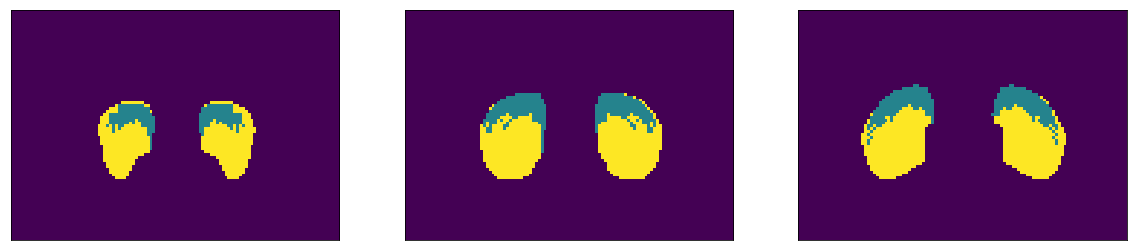

In [18]:
print('Target ROI ID: '+str(Target_ROI_ID))

AV_targetROI = AV_ori == Target_ROI_ID

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 20

fig2, ax2 = plt.subplots(1,len(CoronalIdx), figsize=(20,28), facecolor='w')
for count, idx in enumerate(slices):
    ax2[count].imshow(AV_update[idx,:,:] *AV_targetROI[idx,:,:],\
                      aspect='equal', vmin=0, vmax=1500)
    ax2[count].tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)